In [1]:
import numpy as np
import pandas as pd
import random as rd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
columns=['White King file','White King row','White Rook file','White Rook row','Black King file','Black King row','Result']
data=pd.read_csv('krkopt.data', names=columns)
print(data)
data.describe()
data.info()

      White King file  White King row White Rook file  White Rook row  \
0                   a               1               b               3   
1                   a               1               c               1   
2                   a               1               c               1   
3                   a               1               c               1   
4                   a               1               c               2   
...               ...             ...             ...             ...   
28051               b               1               g               7   
28052               b               1               g               7   
28053               b               1               g               7   
28054               b               1               g               7   
28055               b               1               g               7   

      Black King file  Black King row   Result  
0                   c               2     draw  
1                   c    

In [3]:
classLabels = data['Result'].unique()
print('Unique class labels :',classLabels)

Unique class labels : ['draw' 'zero' 'one' 'two' 'three' 'four' 'five' 'six' 'seven' 'eight'
 'nine' 'ten' 'eleven' 'twelve' 'thirteen' 'fourteen' 'fifteen' 'sixteen']


## Data Preprocessing

In [4]:
rowData = data.drop(columns=['White King file', 'White Rook file', 'Black King file','Result'])
print('Rows Data :\n',rowData,'\n')
fileData = data.drop(columns=['White King row', 'White Rook row', 'Black King row','Result'])
print('Files Data :\n',fileData)

Rows Data :
        White King row  White Rook row  Black King row
0                   1               3               2
1                   1               1               2
2                   1               1               1
3                   1               1               2
4                   1               2               1
...               ...             ...             ...
28051               1               7               5
28052               1               7               6
28053               1               7               7
28054               1               7               5
28055               1               7               5

[28056 rows x 3 columns] 

Files Data :
       White King file White Rook file Black King file
0                   a               b               c
1                   a               c               c
2                   a               c               d
3                   a               c               d
4                   a      

In [5]:
valueData=fileData
rows=['White King row', 'White Rook row', 'Black King row']
c=0
c1=0
for i in fileData:
    for j in fileData[i]:
        valueData[i][c]=np.linalg.norm([ord(j)-100.5,(int(rowData[rows[c1]][c])-4.5)]) #Distance from the center of board
        c+=1
    c=0   
    c1+=1
valueData=valueData.rename(columns={'White King file':'White King Value','White Rook file':'White Rook Value','Black King file':'Black King Value'})
print('Overall Value :\n',valueData)

Overall Value :
       White King Value White Rook Value Black King Value
0              4.94975          2.91548          2.91548
1              4.94975          3.80789          2.91548
2              4.94975          3.80789          3.53553
3              4.94975          3.80789          2.54951
4              4.94975          2.91548          3.80789
...                ...              ...              ...
28051          4.30116          3.53553         0.707107
28052          4.30116          3.53553          1.58114
28053          4.30116          3.53553          2.54951
28054          4.30116          3.53553          1.58114
28055          4.30116          3.53553          2.54951

[28056 rows x 3 columns]


In [6]:
valueData['Result']=data['Result']
print(valueData)

      White King Value White Rook Value Black King Value   Result
0              4.94975          2.91548          2.91548     draw
1              4.94975          3.80789          2.91548     draw
2              4.94975          3.80789          3.53553     draw
3              4.94975          3.80789          2.54951     draw
4              4.94975          2.91548          3.80789     draw
...                ...              ...              ...      ...
28051          4.30116          3.53553         0.707107  sixteen
28052          4.30116          3.53553          1.58114  sixteen
28053          4.30116          3.53553          2.54951  sixteen
28054          4.30116          3.53553          1.58114  sixteen
28055          4.30116          3.53553          2.54951  sixteen

[28056 rows x 4 columns]


In [7]:
valueData=(valueData.sample(frac=0.75))[:25] #Shuffling and taking first 25 samples
X = valueData.iloc[:, :3].values
Y = valueData.iloc[:, 3].values

In [8]:
print('X:\n',X)
print('\nY:\n',Y)

X:
 [[2.1213203435596424 4.949747468305833 3.5355339059327378]
 [0.7071067811865476 3.5355339059327378 2.9154759474226504]
 [0.7071067811865476 2.5495097567963922 3.8078865529319543]
 [3.8078865529319543 3.5355339059327378 3.5355339059327378]
 [1.5811388300841898 0.7071067811865476 2.9154759474226504]
 [2.5495097567963922 2.1213203435596424 3.8078865529319543]
 [3.5355339059327378 4.301162633521313 2.1213203435596424]
 [2.9154759474226504 2.9154759474226504 2.1213203435596424]
 [2.5495097567963922 2.9154759474226504 1.5811388300841898]
 [3.5355339059327378 4.949747468305833 2.5495097567963922]
 [4.301162633521313 2.5495097567963922 2.9154759474226504]
 [3.8078865529319543 4.301162633521313 4.949747468305833]
 [2.5495097567963922 3.8078865529319543 3.5355339059327378]
 [1.5811388300841898 4.949747468305833 3.8078865529319543]
 [2.9154759474226504 0.7071067811865476 3.8078865529319543]
 [2.5495097567963922 2.1213203435596424 2.9154759474226504]
 [0.7071067811865476 2.5495097567963922 4.3

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=15, test_size=0.2)
print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  20
Number of test samples:  5


In [10]:
print('X_train:\n',X_train)
print('\nY_train:\n',y_train)

X_train:
 [[2.5495097567963922 2.9154759474226504 3.5355339059327378]
 [3.5355339059327378 3.5355339059327378 3.8078865529319543]
 [3.8078865529319543 3.5355339059327378 3.5355339059327378]
 [2.1213203435596424 2.9154759474226504 2.9154759474226504]
 [2.9154759474226504 0.7071067811865476 3.8078865529319543]
 [3.5355339059327378 4.949747468305833 2.5495097567963922]
 [1.5811388300841898 0.7071067811865476 2.9154759474226504]
 [4.301162633521313 2.5495097567963922 2.9154759474226504]
 [4.301162633521313 2.1213203435596424 3.5355339059327378]
 [3.8078865529319543 3.8078865529319543 3.5355339059327378]
 [2.9154759474226504 0.7071067811865476 4.949747468305833]
 [1.5811388300841898 4.949747468305833 3.8078865529319543]
 [2.5495097567963922 2.1213203435596424 2.9154759474226504]
 [3.8078865529319543 4.301162633521313 4.949747468305833]
 [2.9154759474226504 2.9154759474226504 2.1213203435596424]
 [2.1213203435596424 4.949747468305833 3.5355339059327378]
 [2.5495097567963922 2.121320343559642

In [11]:
print('X_test:\n',X_test)
print('\ny_test:\n',y_test)

X_test:
 [[0.7071067811865476 2.5495097567963922 4.301162633521313]
 [3.8078865529319543 3.5355339059327378 2.9154759474226504]
 [0.7071067811865476 2.5495097567963922 3.8078865529319543]
 [0.7071067811865476 3.5355339059327378 2.9154759474226504]
 [3.5355339059327378 4.301162633521313 2.1213203435596424]]

y_test:
 ['eight' 'thirteen' 'nine' 'nine' 'fourteen']


In [12]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Using kNN Classifier

In [13]:
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train, y_train)
y_pred = kNN.predict(X_test)

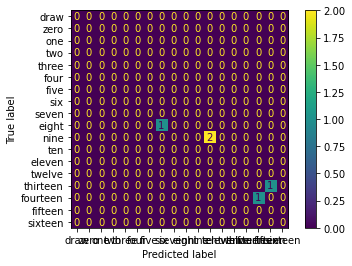

In [14]:
cm = confusion_matrix(y_test, y_pred, labels=classLabels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classLabels)
disp.plot()

## $2^{nd}$ Classifier (Gaussian Naive Bayes) :  

In [17]:
gnb=GaussianNB().fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

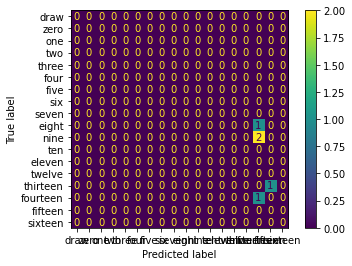

In [18]:
cm1 = confusion_matrix(y_test, y_pred1, labels=classLabels)
disp1 = ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels=classLabels)
disp1.plot()